# Preparación de los datos
Irene Pico López

In [1]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#### 1. Cargamos los datos:

In [2]:
# Cargar los datos desde un archivo HDF5
ibex35 = pd.read_hdf('ibex35.h5', key='rawData')
ibex35

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,11986.500000,12145.099609,11986.099609,12145.099609,12145.086914,184200
2010-01-05,12141.799805,12240.500000,12139.799805,12204.400391,12204.387695,238400
2010-01-06,12216.400391,12230.700195,12147.599609,12222.500000,12222.487305,123800
2010-01-07,12163.000000,12199.700195,12079.099609,12166.299805,12166.287109,192400
2010-01-08,12218.000000,12232.200195,12079.900391,12163.000000,12162.987305,213200
...,...,...,...,...,...,...
2019-07-25,9354.599609,9453.000000,9232.000000,9289.900391,9289.900391,209481800
2019-07-26,9281.099609,9290.200195,9204.900391,9225.500000,9225.500000,220713700
2019-07-29,9201.299805,9257.400391,9194.400391,9215.400391,9215.400391,143203100


#### 2. Creación de características adicionales:

In [3]:
# Crear características adicionales de Rendimientos
ibex35['ret_1'] = ibex35['Adj Close'].pct_change(1)
ibex35['ret_5'] = ibex35['Adj Close'].pct_change(5)
ibex35['ret_21'] = ibex35['Adj Close'].pct_change(21)
ibex35['ret_63'] = ibex35['Adj Close'].pct_change(63)

# Obtención de Indicadores técnicos
ibex35['PPO'] = talib.PPO(ibex35['Adj Close'])
ibex35['NATR'] = talib.NATR(ibex35['High'], ibex35['Low'], ibex35['Adj Close'])
ibex35['RSI'] = talib.RSI(ibex35['Adj Close'])
upperband, middleband, lowerband = talib.BBANDS(ibex35['Adj Close'])
ibex35['bbl'] = ibex35['Adj Close'] / lowerband
ibex35['bbu'] = upperband / ibex35['Adj Close']

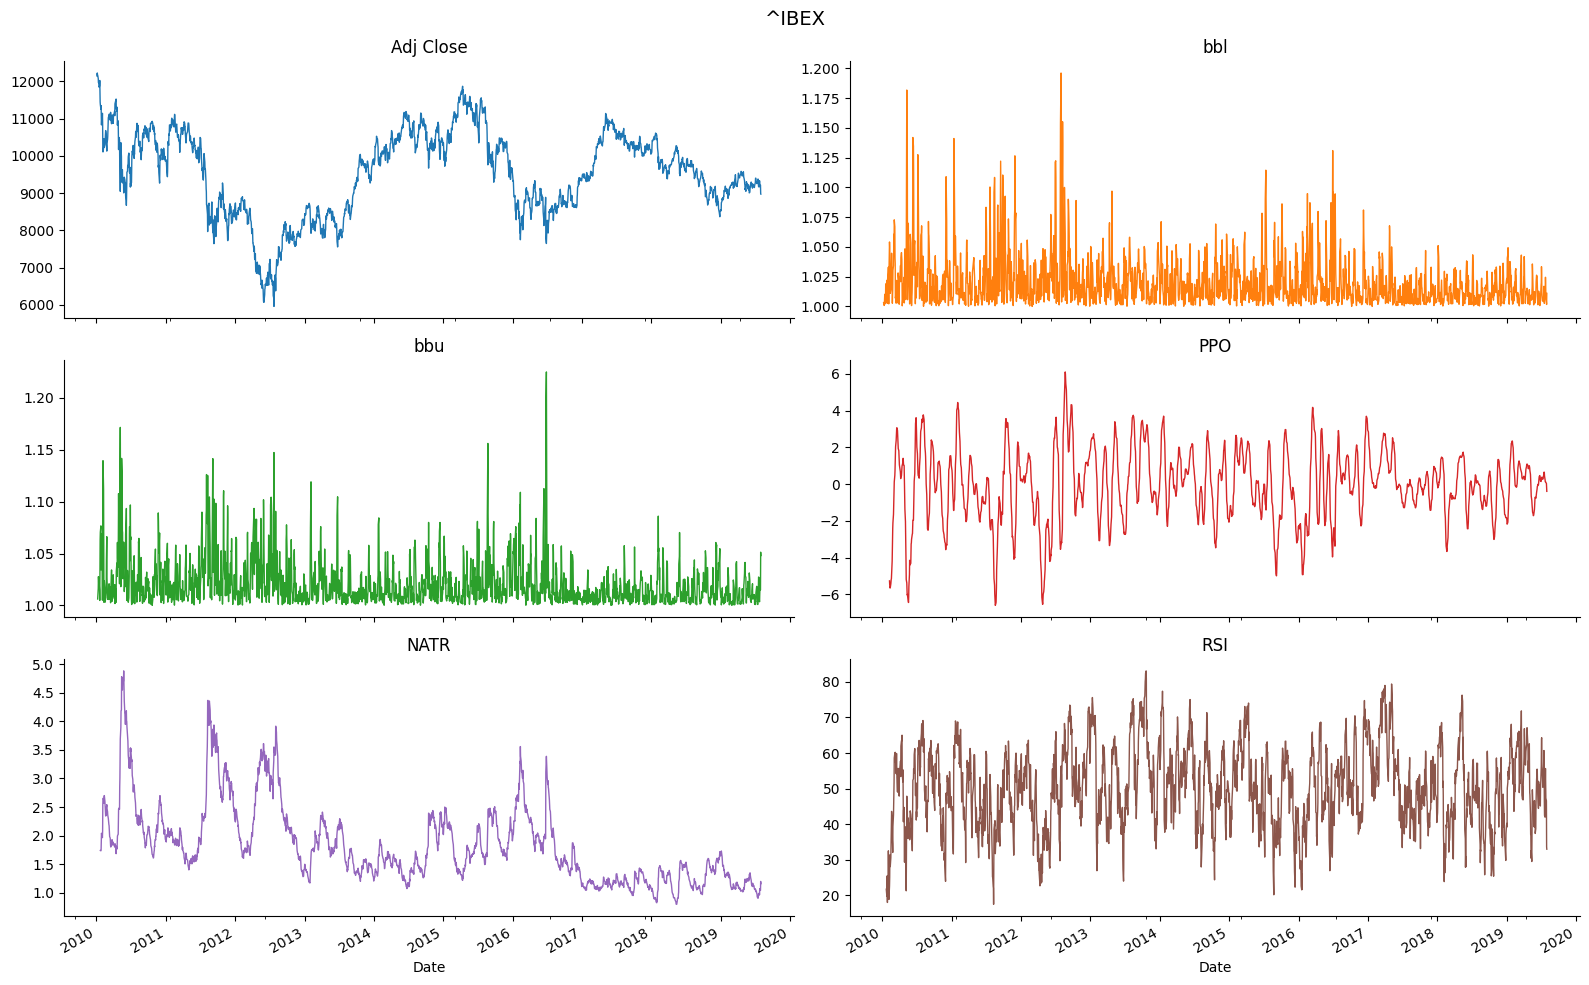

In [4]:
## Visualización de los Indicadores técnicos
####################################################
# Definir el índice de las columnas y los indicadores a graficar
indicators = ['Adj Close', 'bbl', 'bbu', 'PPO', 'NATR', 'RSI']
ticker = '^IBEX'  # Nombre del ticker para el título

# Crear gráficos de línea para cada indicador en subplots
ibex35[indicators].plot(
    lw=1, 
    subplots=True, 
    figsize=(16, 10), 
    title=indicators, 
    layout=(3, 2), 
    legend=False
)

# Ajustes adicionales para la visualización
plt.suptitle(ticker, fontsize=14)
sns.despine()
plt.tight_layout()
#plt.subplots_adjust(top=.95)

# Guardar el gráfico en un archivo
plt.savefig('ibex35_indicadores.png', format='png', dpi=300)

plt.show()

#### 3. Creación de indicadores temporales:

In [5]:
# Añadir indicadores temporales
ibex35['weekday'] = ibex35.index.weekday
ibex35['month'] = ibex35.index.month
ibex35['year'] = ibex35.index.year
ibex35['day_of_year'] = ibex35.index.dayofyear.astype('int64')
ibex35['week_of_year'] = ibex35.index.isocalendar().week.astype('int64')

ibex35

,Open,High,Low,Close,Adj Close,Volume,ret_1,ret_5,ret_21,ret_63,PPO,NATR,RSI,bbl,bbu,weekday,month,year,day_of_year,week_of_year
Date,,,,,,,,,,,,,,,,,,,,
2010-01-04,11986.500000,12145.099609,11986.099609,12145.099609,12145.086914,184200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2010,4,1
2010-01-05,12141.799805,12240.500000,12139.799805,12204.400391,12204.387695,238400,0.004883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010,5,1
2010-01-06,12216.400391,12230.700195,12147.599609,12222.500000,12222.487305,123800,0.001483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2010,6,1
2010-01-07,12163.000000,12199.700195,12079.099609,12166.299805,12166.287109,192400,-0.004598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2010,7,1
2010-01-08,12218.000000,12232.200195,12079.900391,12163.000000,12162.987305,213200,-0.000271,NaN,NaN,NaN,NaN,NaN,NaN,1.003298,1.006125,4,1,2010,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-25,9354.599609,9453.000000,9232.000000,9289.900391,9289.900391,209481800,-0.004266,0.006959,0.014469,-0.022733,0.120626,1.070998,52.302886,1.019493,1.009893,3,7,2019,206,30
2019-07-26,9281.099609,9290.200195,9204.900391,9225.500000,9225.500000,220713700,-0.006932,0.005997,0.008494,-0.030650,0.088905,1.067484,47.337975,1.009084,1.016057,4,7,2019,207,30
2019-07-29,9201.299805,9257.400391,9194.400391,9215.400391,9215.400391,143203100,-0.001095,0.005664,0.001805,-0.037114,0.035416,1.041153,46.591030,1.003489,1.014983,0,7,2019,210,31


#### 4. Eliminación de filas con valores nulos y estandarización:

In [6]:
# Eliminar filas con valores nulos
ibex35.dropna(inplace=True)

In [7]:
# Eliminamos variables que no vamos a emplear más
ibex35 = ibex35.drop(['Open', 'High', 'Low', 'Close'], axis=1)

In [8]:
# Estandarización de nuestras características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(ibex35.drop(['Adj Close', 'weekday', 'month', 'year'], axis=1))
scaled_data = pd.DataFrame(scaled_features, index=ibex35.index, columns=ibex35.drop(['Adj Close', 'weekday', 'month', 'year'], axis=1).columns)
scaled_data['weekday'] = ibex35['weekday']
scaled_data['month'] = ibex35['month']
scaled_data['year'] = ibex35['year']
scaled_data['day_of_year'] = ibex35['day_of_year']
scaled_data['week_of_year'] = ibex35['week_of_year']
scaled_data['adj_close'] = ibex35['Adj Close']

In [9]:
## VISUALIZAMOS DATAFRAME FINAL
scaled_data

,Volume,ret_1,ret_5,ret_21,ret_63,PPO,NATR,RSI,bbl,bbu,day_of_year,week_of_year,weekday,month,year,adj_close
Date,,,,,,,,,,,,,,,,
2010-04-01,-2.263438,1.294746,-0.071774,0.677757,-1.003285,0.568880,0.017781,0.318646,-0.064568,-0.489973,91,13,3,4,2010,11067.889648
2010-04-06,-2.263055,0.598988,0.262089,0.692522,-0.967125,0.375282,0.007371,0.555307,0.404273,-0.650550,96,14,1,4,2010,11160.587891
2010-04-07,-2.262566,0.195918,0.293481,0.278267,-0.953910,0.264386,-0.047734,0.633206,0.602781,-0.551017,97,14,2,4,2010,11191.288086
2010-04-08,-2.262675,-0.737580,0.282447,-0.004224,-1.013532,0.180869,-0.009387,0.244147,-0.018206,-0.053019,98,14,3,4,2010,11076.289062
2010-04-09,-2.262121,2.055539,1.571501,0.637316,-0.712335,0.231287,0.033861,1.007219,0.920612,-0.865417,99,14,4,4,2010,11394.188477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-25,-0.138905,-0.306907,0.225270,0.258643,-0.250270,0.087780,-1.085854,0.147526,-0.080420,-0.501317,206,30,3,7,2019,9289.900391
2019-07-26,-0.024923,-0.497983,0.193811,0.151425,-0.340648,0.071285,-1.090855,-0.294887,-0.557507,-0.225595,207,30,4,7,2019,9225.500000
2019-07-29,-0.811504,-0.079656,0.182893,0.031397,-0.414439,0.043471,-1.128329,-0.361446,-0.813985,-0.273612,210,31,0,7,2019,9215.400391


#### 5. Almacenamiento de los datos tratados:

In [10]:
# Guardar el conjunto de datos definitivo en HDF5
scaled_data.to_hdf('ibex35.h5', key='datos_tratados', mode='a')

In [11]:
# Mostramos todas las claves en el archivo
with pd.HDFStore('ibex35.h5', mode='r') as hdf:
    print(hdf.keys())  

['/datos_tratados', '/rawData']
